In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import ConvexHull


In [4]:
x0 = 0.2 
r = 1 
def evolution(x0,r,size=500):
    result = np.zeros(size)
    result[0] = x0
    for i in range(499):
        x_i_1 = r*result[i]*(1 - result[i] )
        result[i+1] = x_i_1
    return result


In [10]:
# Prob 1(a) 
# Apparantly the fixed points are x = 0, and x = (r-1)/2
for r in [1,2,3,4]:
    print(f'At r = {r}:')
    f_prime = lambda r,x: r*(1-2*x)
    for x in [(0),r/2-0.5]:
        stab = "stable" if f_prime(r,x) < 0 else 'unstable'
        print(f"x = {x}, {stab}")

At r = 1:
x = 0, unstable
x = 0.0, unstable
At r = 2:
x = 0, unstable
x = 0.5, unstable
At r = 3:
x = 0, unstable
x = 1.0, stable
At r = 4:
x = 0, unstable
x = 1.5, stable


For x0 = 0.2, r = 2:
Converged at x_6
For x0 = 0.2, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.2, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.2, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.2, r = 4.0:
Converged at x_361


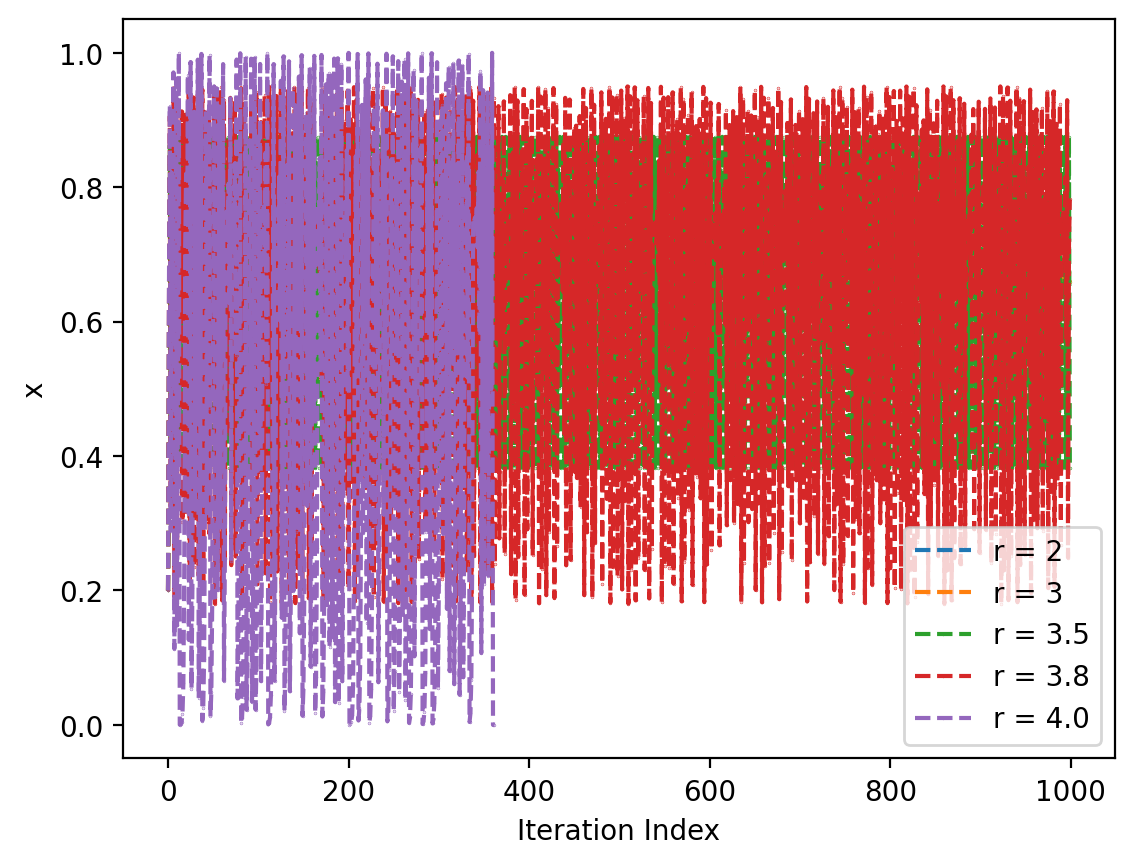

In [97]:
# Prob 1 (b)
import numpy as np

def evolution(x0,r,size=1000,convergence = 1e-6,log=1):
    result = np.zeros(size)
    result[0] = x0
    for i in range(size-1):
        x_i_1 = r*result[i]*(1 - result[i] )
        result[i+1] = x_i_1
        if np.abs(result[i+1]-result[i])<convergence:
            if log==1:
                print(f'For x0 = {x0}, r = {r}:\nConverged at x_{i+1}') 
            return result[:i+2]
    if log ==1:   
        print(f'For x0 = {x0}, r = {r}: \nMaximum iteration {size} has reached, yet the system still is not converged.') 
    return result

conv = 1e-6
plt.figure(dpi=200)
x0 = 0.2
rs = [2, 3, 3.5,3.8,4.0]
for r in rs:
    res = evolution(x0, r,convergence=conv)
    plt.plot(range(len(res)), res, '--o', label=f"r = {r}",markersize=0.2)

#plt.ylim(-conv,conv)
plt.xlabel("Iteration Index")
plt.ylabel("x")
plt.legend()
plt.show()

For x0 = 0.1, r = 2:
Converged at x_7
For x0 = 0.3, r = 2:
Converged at x_5
For x0 = 0.5, r = 2:
Converged at x_1
For x0 = 0.1, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.3, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.5, r = 3: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.1, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.3, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.5, r = 3.5: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.1, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.3, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
For x0 = 0.5, r = 3.8: 
Maximum iteration 1000 has reached, yet the system still is not converged.
F

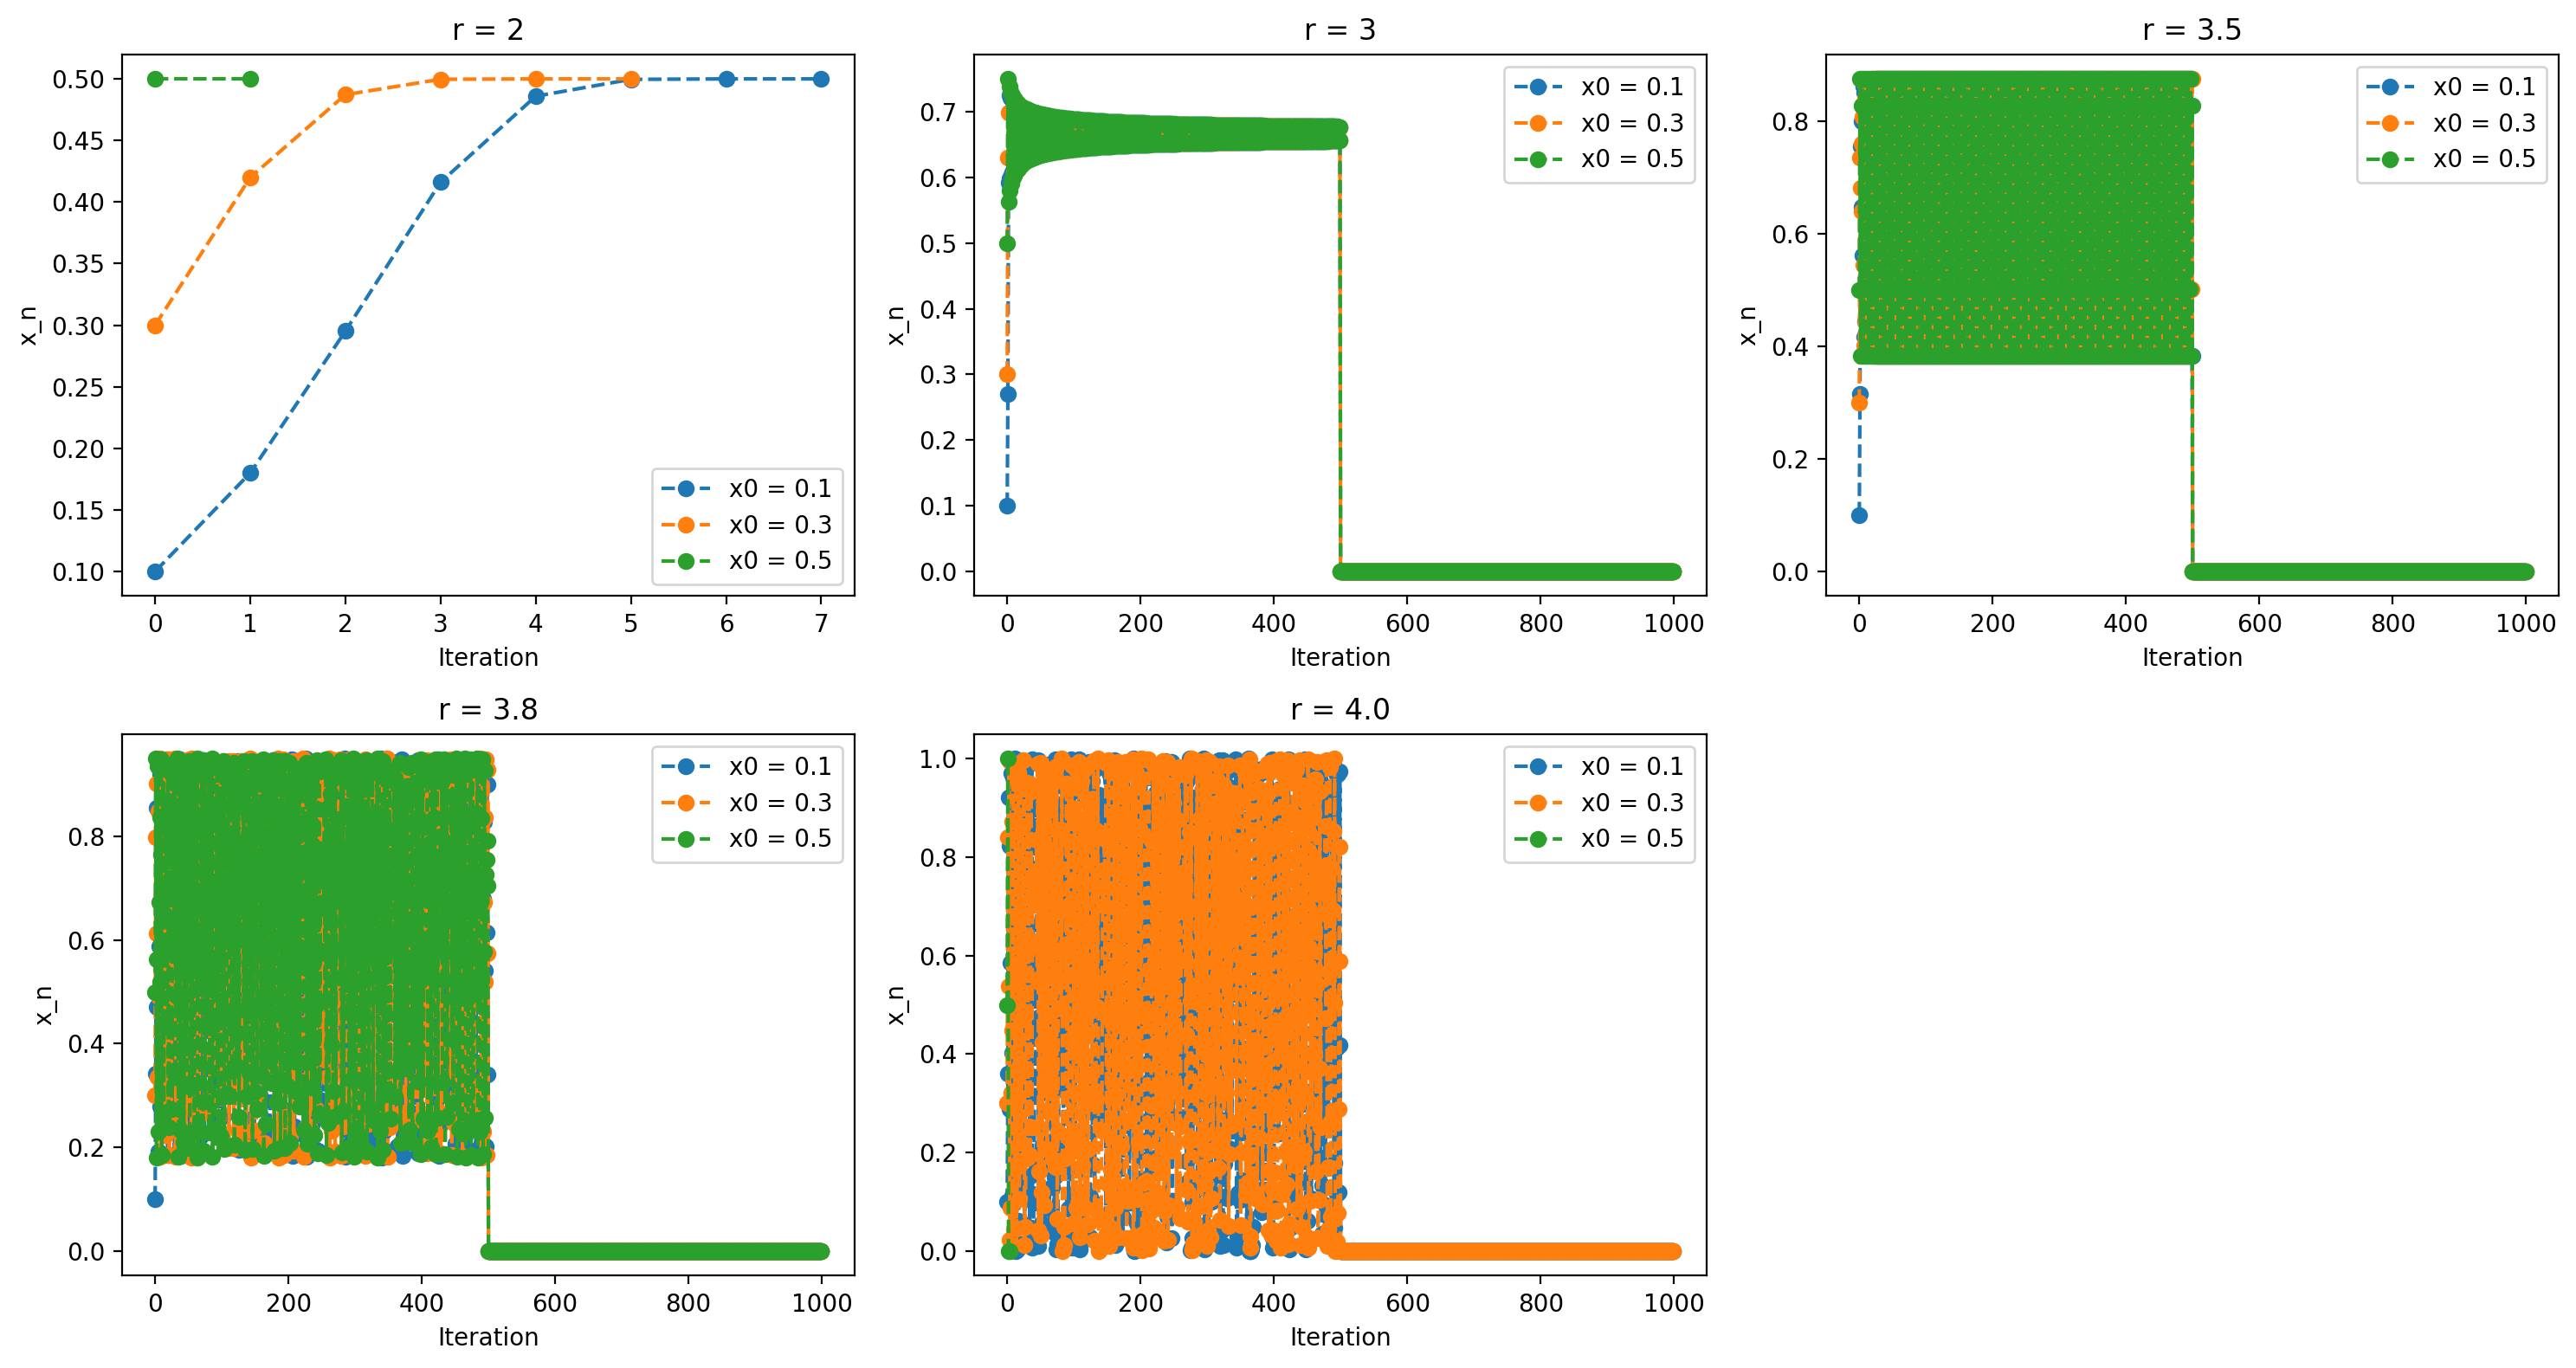

In [ ]:
# Prob 1 (c)
rs = [2, 3, 3.5, 3.8, 4.0]
initial_conditions = [0.1, 0.3, 0.5]

fig, axes = plt.subplots(2, 3, figsize=(15, 8), dpi=200)
axes = axes.flatten()  
for i, r in enumerate(rs):
    ax = axes[i]
    for x0 in initial_conditions:
        res = evolution(x0, r)
        ax.plot(range(len(res)), res, '--o', label=f"x0 = {x0}")
    ax.set_title(f"r = {r}")
    ax.set_xlabel("Iteration")
    ax.set_ylabel("x_n")
    ax.legend()

if len(rs) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

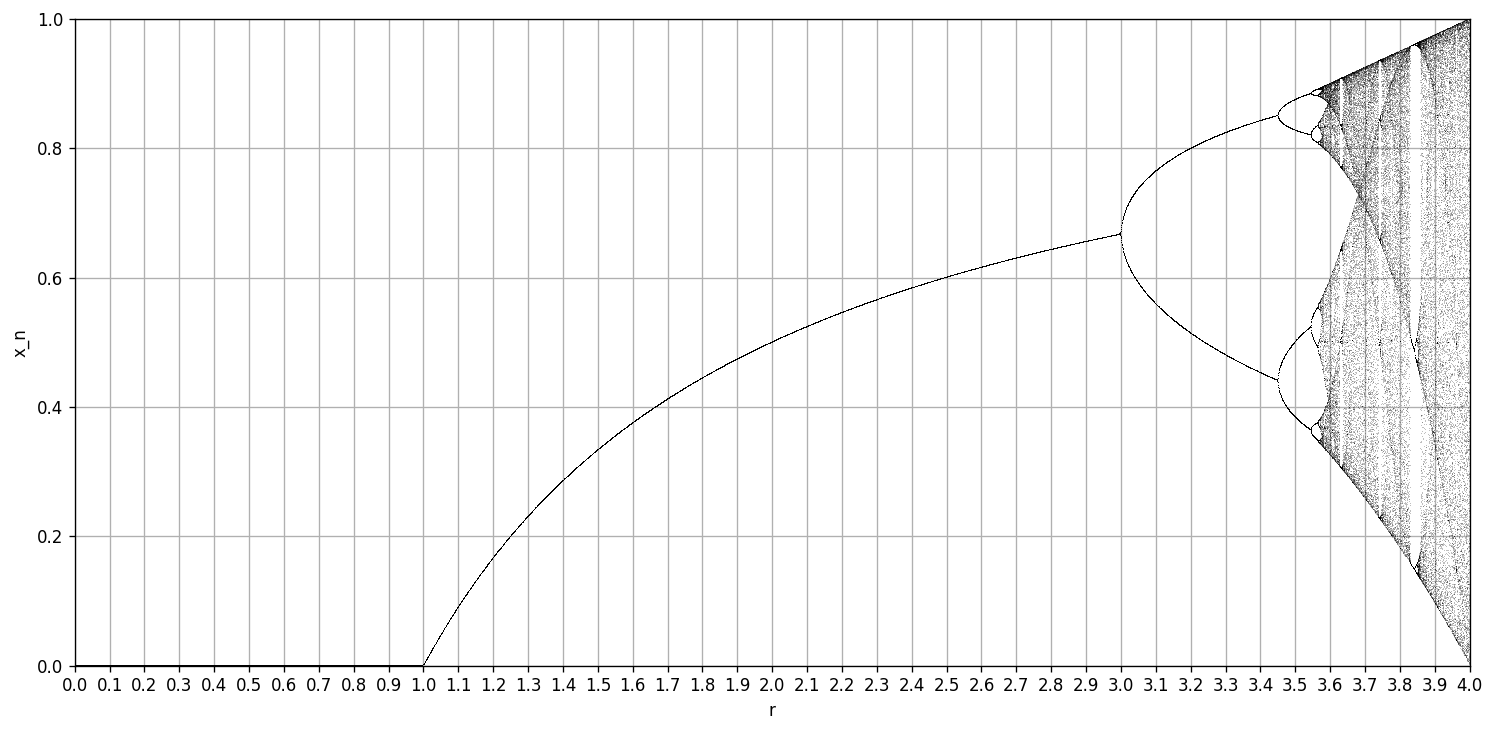

Using my eyes I know:
r1: 1
r2: 3
r3: 3
r4: 3.5
r5: 3.55
r6: 3.7
r7: 3.85
r8: 3.9


In [128]:
# Prob 1 (d)
r_min = 0.0          
r_max = 4.0          
num_r = 5000        

iterations = 1000    
transients = 900    

r_values = np.linspace(r_min, r_max, num_r)

r_list = []
x_list = []

for r in r_values:
    x = 0.2  
    for i in range(iterations):
        x = r * x * (1 - x)
        if i >= transients:
            r_list.append(r)
            x_list.append(x)

plt.figure(figsize=(15, 7),dpi=120)
plt.plot(r_list, x_list, ',k', alpha=0.25)  
plt.xlabel("r")
plt.ylabel("x_n")
plt.xlim(r_min, r_max)
plt.ylim(0, 1)
plt.grid(1)
plt.xticks(np.arange(0, 4.1, 0.1))

plt.show()

# Using my eyes I know:
print("Using my eyes I know:")
print(f"r1: {1}")
print(f"r2: {3}")
print(f"r3: {3}")
print(f"r4: {3.5}")
print(f"r5: {3.55}")
print(f"r6: {3.7}")
print(f"r7: {3.85}")
print(f"r8: {3.9}")


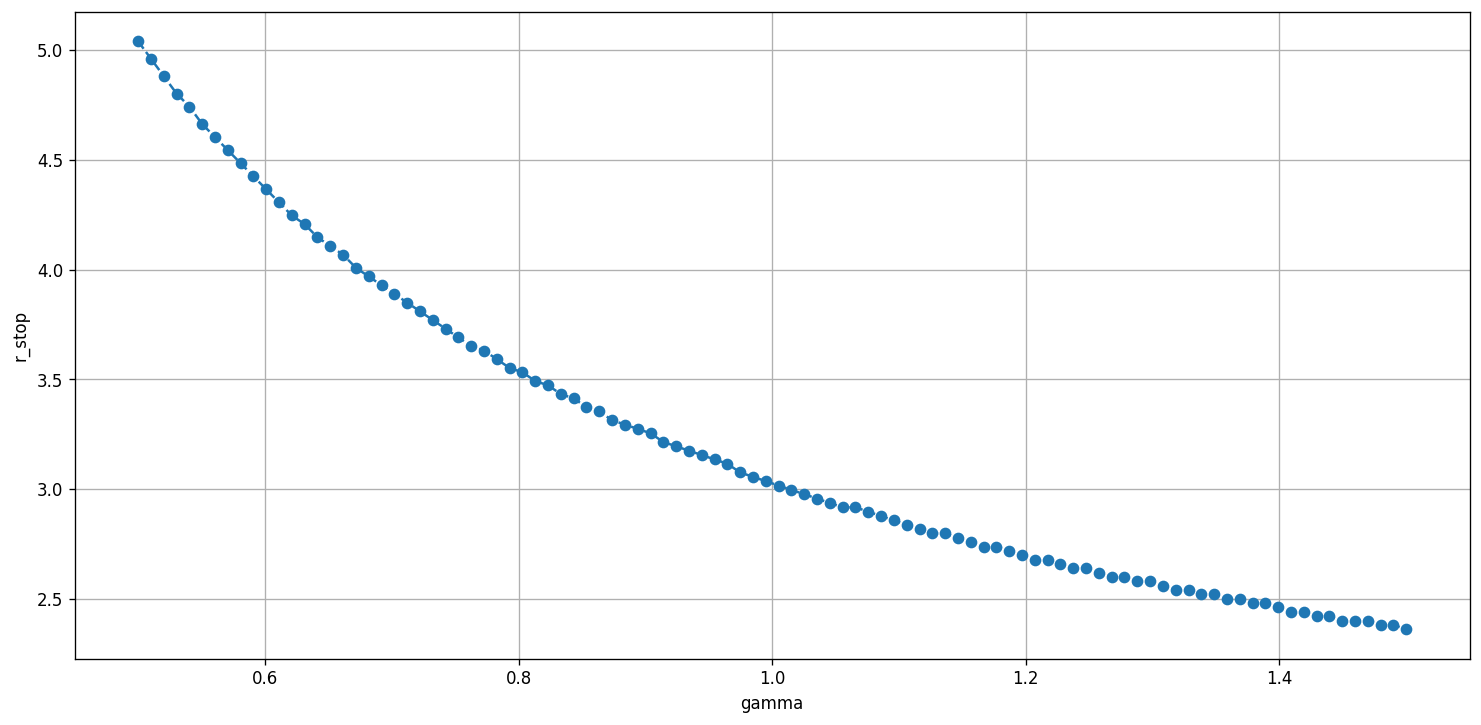

In [42]:
# Prob 1(e)
x0 = 0.2
r_list = np.linspace(0.1, 10, 500) 
gamma_vals = np.linspace(0.5,1.5,100)
sim_length = 100
transient = 90
threshold = 0.05

r_stop = np.zeros(len(gamma_vals))

for j, g in enumerate(gamma_vals):
    found_bifurcation = False
    for r in r_list:
        x = x0  
        temp = [] 
        evolve = lambda x_: r * x_ * (1 - x_**g)
        for i in range(sim_length):
            x = evolve(x)
            if i >= transient:
                temp.append(x)

        if np.std(temp) > threshold:
            r_stop[j] = r
            found_bifurcation = True
            break
    if not found_bifurcation:
        r_stop[j] = np.nan  

             
plt.figure(figsize=(15, 7),dpi=120)

plt.plot(gamma_vals, r_stop, '--o')  
plt.xlabel("gamma")
plt.ylabel("r_stop")

plt.grid(1)


# Prob 2 Julia

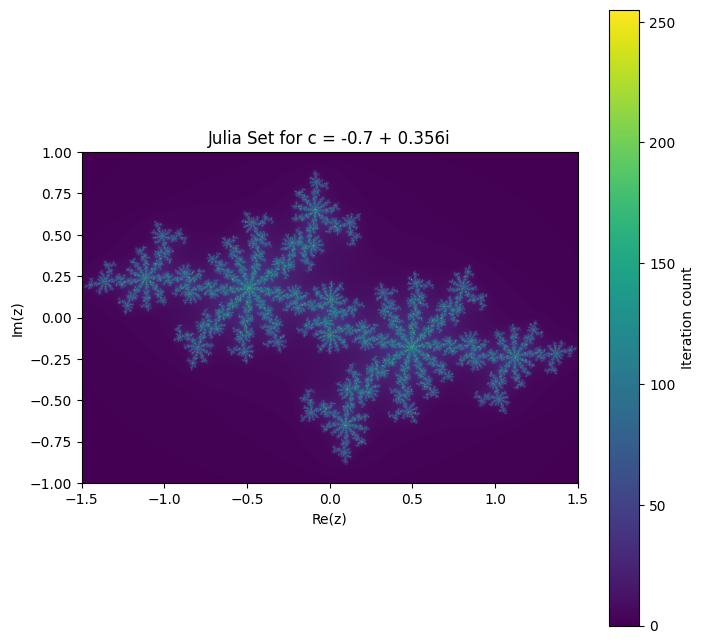

In [ ]:
# 2(a)
width, height = 800, 800
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
max_iter = 256
c = -0.7 + 0.356j

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

julia = np.zeros(Z.shape, dtype=int)

mask = np.ones(Z.shape, dtype=bool)

for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    
    escaped = np.abs(Z) > 2
    
    newly_escaped = escaped & mask
    
    julia[newly_escaped] = i
    
    mask[newly_escaped] = False

plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap="viridis", origin='lower')
plt.colorbar(label="Iteration count")
plt.title("Julia Set for c = -0.7 + 0.356i")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()


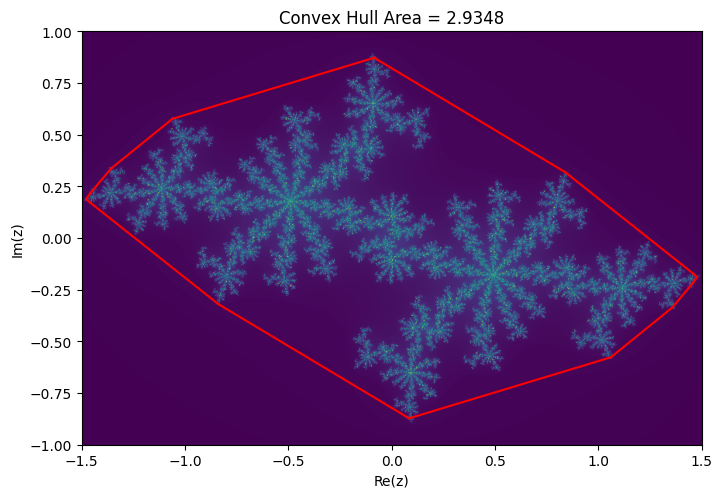

In [ ]:
# 2 b and c
width, height = 800, 800
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
max_iter = 128
c = -0.7 + 0.356j  

x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

mask = np.ones(Z.shape, dtype=bool)

for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    mask[np.abs(Z) > 7] = False


#julia = mask.astype(float)

indices = np.where(mask)
points = np.column_stack((X[indices], Y[indices]))
hull = ConvexHull(points)
hull_area = hull.volume

plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap="viridis", origin='lower')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-', lw=1.5)
plt.title(f"Convex Hull Area = {hull_area:.4f}")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()

Estimated fractal (box-counting) dimension: 0.9779


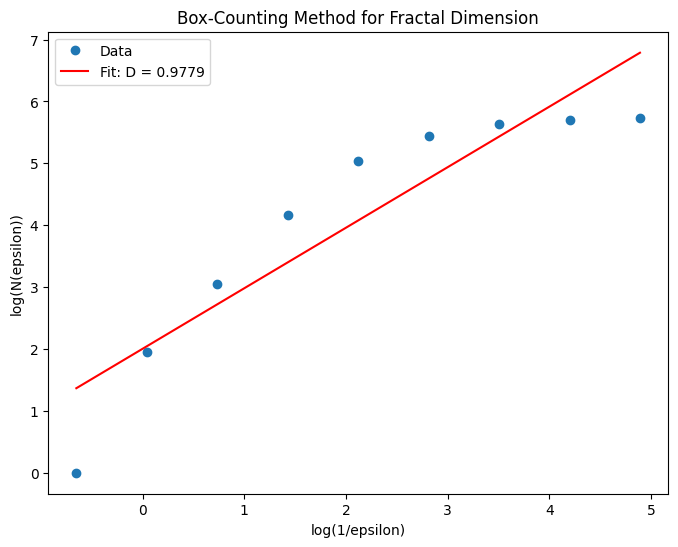

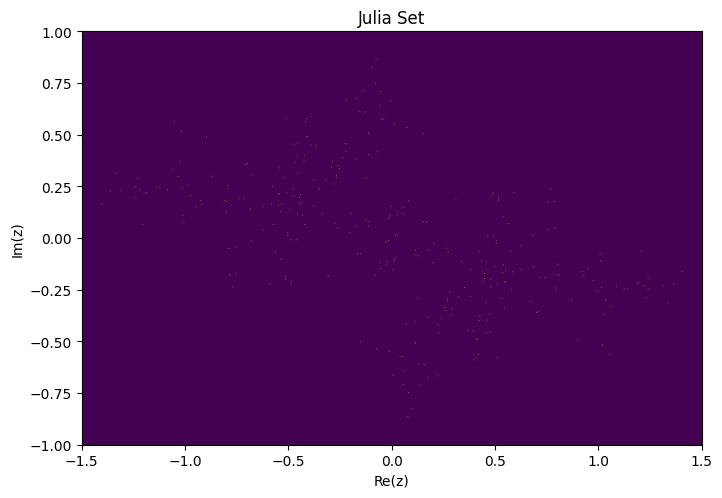

In [ ]:
# 2 d
width, height = 800, 800
xmin, xmax = -1.5, 1.5
ymin, ymax = -1, 1
max_iter = 256
c = -0.7 + 0.356j  

# Create the grid in the complex plane
x = np.linspace(xmin, xmax, width)
y = np.linspace(ymin, ymax, height)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Initialize mask: True if point remains (not diverged)
mask = np.ones(Z.shape, dtype=bool)

# Iterate the Julia map
for i in range(max_iter):
    Z[mask] = Z[mask]**2 + c
    mask[np.abs(Z) > 7] = False

# Create a binary image (1 = inside the Julia set, 0 = outside)
julia = mask.astype(float)

# --- Box-Counting Function ---
def box_count(binary_image, box_size):
    """
    Count the number of boxes of side length 'box_size' (in pixels)
    that contain at least one pixel of the object.
    """
    h, w = binary_image.shape
    count = 0
    # Determine number of boxes along each axis
    n_rows = h // box_size
    n_cols = w // box_size
    for i in range(n_rows):
        for j in range(n_cols):
            # Extract the sub-box
            sub_box = binary_image[i*box_size:(i+1)*box_size, j*box_size:(j+1)*box_size]
            if np.any(sub_box):  # if at least one pixel is part of the set
                count += 1
    return count

# --- Box-Counting over Different Scales ---
# Use a list of box sizes (in pixels)
box_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512]
N_boxes = np.array([box_count(mask, size) for size in box_sizes])

# Convert box size from pixel units to the coordinate units.
# Pixel size in x (or y) direction:
pixel_size = (xmax - xmin) / width
epsilons = np.array(box_sizes) * pixel_size

# We expect a scaling law: N(epsilon) ~ (1/epsilon)^D,
# so log(N) = D * log(1/epsilon) + constant.
log_eps_inv = np.log(1/epsilons)
log_N = np.log(N_boxes)

# Fit a line to (log(1/epsilon), log(N))
slope, intercept = np.polyfit(log_eps_inv, log_N, 1)
print("Estimated fractal (box-counting) dimension: {:.4f}".format(slope))

# --- Plot the Scaling Relation ---
plt.figure(figsize=(8, 6))
plt.plot(log_eps_inv, log_N, 'o', label='Data')
plt.plot(log_eps_inv, slope * log_eps_inv + intercept, 'r-', label=f'Fit: D = {slope:.4f}')
plt.xlabel('log(1/epsilon)')
plt.ylabel('log(N(epsilon))')
plt.title('Box-Counting Method for Fractal Dimension')
plt.legend()
plt.show()

# --- Optionally, display the Julia set ---
plt.figure(figsize=(8, 8))
plt.imshow(julia, extent=(xmin, xmax, ymin, ymax), cmap="viridis", origin='lower')
plt.title("Julia Set")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()